In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats
from matplotlib import dates as mdates


In [2]:
# Read in the data
cleanFile = "../resources/cleansheet1.csv"
flights_data = pd.read_csv(cleanFile)
flights_data.head()

,Month,Country to/from,Passengers In,Freight In,Mail In,Passengers Out,Freight Out,Mail Out,Year
0,Jan009,Argentina,"3,021",4.3,0.6,"1,959",8.3,0.0,2009
1,Jan009,New Zealand,627,76.3,0.0,"1,821",68.5,0.0,2009
2,Jan009,New Caledonia,"6,658",4.9,0.6,"5,365",68.6,1.3,2009
3,Jan009,Canada,"7,489",174.8,0.0,"6,424",105.2,0.0,2009
4,Jan009,China,"12,458",201.3,18.6,"11,163",142.4,2.9,2009


In [3]:
# create new dataframe for passenger information only
passengers_df = flights_data[["Month", "Country to/from", "Passengers In", "Passengers Out", "Year"]]


In [4]:
# check column types
print (passengers_df.dtypes)

Month              object
Country to/from    object
Passengers In      object
Passengers Out     object
Year                int64
dtype: object


In [5]:
# remove commas from Passenger in and out columns
passengers_df = passengers_df.replace(',','', regex=True)

In [6]:
# check commas have been removed
passengers_df

,Month,Country to/from,Passengers In,Passengers Out,Year
0,Jan009,Argentina,3021,1959,2009
1,Jan009,New Zealand,627,1821,2009
2,Jan009,New Caledonia,6658,5365,2009
3,Jan009,Canada,7489,6424,2009
4,Jan009,China,12458,11163,2009
...,...,...,...,...,...
15052,Nov020,Korea,..,..,2020
15053,Nov020,Singapore,..,..,2020
15054,Nov020,USA,..,..,2020
15055,Nov020,Vietnam,248,691,2020


In [7]:
# remove missing values from Passangers In column in dataframe
passengers_df.drop(passengers_df[passengers_df['Passengers In'] == ".."].index, inplace = True)

In [8]:
# remove missing values from Passangers Out column in dataframe
passengers_df.drop(passengers_df[passengers_df['Passengers Out'] == ".."].index, inplace = True)

In [9]:
# change column types
passengers_df['Passengers In'] = passengers_df['Passengers In'].astype(float)
passengers_df['Passengers Out'] = passengers_df['Passengers Out'].astype(float)

In [10]:
# check column types
print (passengers_df.dtypes)

Month               object
Country to/from     object
Passengers In      float64
Passengers Out     float64
Year                 int64
dtype: object


In [11]:
#filter data per month
# jan passengers
passengers_jan = passengers_df[passengers_df["Month"].isin(['Jan009', 'Jan010', 'Jan011', 'Jan012', 'Jan013', 'Jan014', 'Jan015', 'Jan016', 'Jan017', 'Jan018', 'Jan019', 'Jan020'])]
# feb passengers
passengers_feb = passengers_df[passengers_df["Month"].isin(['Feb009', 'Feb010', 'Feb011', 'Feb012', 'Feb013', 'Feb014', 'Feb015', 'Feb016', 'Feb017', 'Feb018', 'Feb019', 'Feb020'])]
# mar passengers
passengers_mar = passengers_df[passengers_df["Month"].isin(['Mar009', 'Mar010', 'Mar011', 'Mar012', 'Mar013', 'Mar014', 'Mar015', 'Mar016', 'Mar017', 'Mar018', 'Mar019', 'Mar020'])]
# apr passengers
passengers_apr = passengers_df[passengers_df["Month"].isin(['Apr009', 'Apr010', 'Apr011', 'Apr012', 'Apr013', 'Apr014', 'Apr015', 'Apr016', 'Apr017', 'Apr018', 'Apr019', 'Apr020'])]
# may passengers
passengers_may = passengers_df[passengers_df["Month"].isin(['May009', 'May010', 'May011', 'May012', 'May013', 'May014', 'May015', 'May016', 'May017', 'May018', 'May019', 'May020'])]
# jun passengers
passengers_jun = passengers_df[passengers_df["Month"].isin(['Jun009', 'Jun010', 'Jun011', 'Jun012', 'Jun013', 'Jun014', 'Jun015', 'Jun016', 'Jun017', 'Jun018', 'Jun019', 'Jun020'])]
# jul passengers
passengers_jul = passengers_df[passengers_df["Month"].isin(['Jul009', 'Jul010', 'Jul011', 'Jul012', 'Jul013', 'Jul014', 'Jul015', 'Jul016', 'Jul017', 'Jul018', 'Jul019', 'Jul020'])]
# aug passengers
passengers_aug = passengers_df[passengers_df["Month"].isin(['Aug009', 'Aug010', 'Aug011', 'Aug012', 'Aug013', 'Aug014', 'Aug015', 'Aug016', 'Aug017', 'Aug018', 'Aug019', 'Aug020'])]
# sep passengers
passengers_sep = passengers_df[passengers_df["Month"].isin(['Sep009', 'Sep010', 'Sep011', 'Sep012', 'Sep013', 'Sep014', 'Sep015', 'Sep016', 'Sep017', 'Sep018', 'Sep019', 'Sep020'])]
# oct passengers
passengers_oct = passengers_df[passengers_df["Month"].isin(['Oct009', 'Oct010', 'Oct011', 'Oct012', 'Oct013', 'Oct014', 'Oct015', 'Oct016', 'Oct017', 'Oct018', 'Oct019', 'Oct020'])]
# nov passengers
passengers_nov = passengers_df[passengers_df["Month"].isin(['Nov009', 'Nov010', 'Nov011', 'Nov012', 'Nov013', 'Nov014', 'Nov015', 'Nov016', 'Nov017', 'Nov018', 'Nov019', 'Nov020'])]
# dec passengers
passengers_dec = passengers_df[passengers_df["Month"].isin(['Dec009', 'Dec010', 'Dec011', 'Dec012', 'Dec013', 'Dec014', 'Dec015', 'Dec016', 'Dec017', 'Dec018', 'Dec019', 'Dec020'])]

In [12]:
# Create and format dataframes for every year - summed with monthly passengers in and out
# jan
passengers_jan_grouped = passengers_jan.groupby(["Month"], sort = False)
passengers_jan_grouped_in = passengers_jan_grouped["Passengers In"].sum()
passengers_jan_grouped_out = passengers_jan_grouped["Passengers Out"].sum()
passengers_jan_df = pd.DataFrame({'Passengers In': passengers_jan_grouped_in,
                   'Passengers Out': passengers_jan_grouped_out})
passengers_jan_df = passengers_jan_df.reset_index()
passengers_jan_df['Month'] = passengers_jan_df['Month'].replace(["Jan009", "Jan010", "Jan011", "Jan012", "Jan013", "Jan014", "Jan015", "Jan016", "Jan017", "Jan018", "Jan019", "Jan020",],'Jan')
passengers_jan_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# feb
passengers_feb_grouped = passengers_feb.groupby(["Month"], sort = False)
passengers_feb_grouped_in = passengers_feb_grouped["Passengers In"].sum()
passengers_feb_grouped_out = passengers_feb_grouped["Passengers Out"].sum()
passengers_feb_df = pd.DataFrame({'Passengers In': passengers_feb_grouped_in,
                   'Passengers Out': passengers_feb_grouped_out})
passengers_feb_df = passengers_feb_df.reset_index()
passengers_feb_df['Month'] = passengers_feb_df['Month'].replace(["Feb009", "Feb010", "Feb011", "Feb012", "Feb013", "Feb014", "Feb015", "Feb016", "Feb017", "Feb018", "Feb019", "Feb020",],'Feb')
passengers_feb_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# mar
passengers_mar_grouped = passengers_mar.groupby(["Month"], sort = False)
passengers_mar_grouped_in = passengers_mar_grouped["Passengers In"].sum()
passengers_mar_grouped_out = passengers_mar_grouped["Passengers Out"].sum()
passengers_mar_df = pd.DataFrame({'Passengers In': passengers_mar_grouped_in,
                   'Passengers Out': passengers_mar_grouped_out})
passengers_mar_df = passengers_mar_df.reset_index()
passengers_mar_df['Month'] = passengers_mar_df['Month'].replace(["Mar009", "Mar010", "Mar011", "Mar012", "Mar013", "Mar014", "Mar015", "Mar016", "Mar017", "Mar018", "Mar019", "Mar020",],'Mar')
passengers_mar_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# apr
passengers_apr_grouped = passengers_apr.groupby(["Month"], sort = False)
passengers_apr_grouped_in = passengers_apr_grouped["Passengers In"].sum()
passengers_apr_grouped_out = passengers_apr_grouped["Passengers Out"].sum()
passengers_apr_df = pd.DataFrame({'Passengers In': passengers_apr_grouped_in,
                   'Passengers Out': passengers_apr_grouped_out})
passengers_apr_df = passengers_apr_df.reset_index()
passengers_apr_df['Month'] = passengers_apr_df['Month'].replace(["Apr009", "Apr010", "Apr011", "Apr012", "Apr013", "Apr014", "Apr015", "Apr016", "Apr017", "Apr018", "Apr019", "Apr020",],'Apr')
passengers_apr_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# may
passengers_may_grouped = passengers_may.groupby(["Month"], sort = False)
passengers_may_grouped_in = passengers_may_grouped["Passengers In"].sum()
passengers_may_grouped_out = passengers_may_grouped["Passengers Out"].sum()
passengers_may_df = pd.DataFrame({'Passengers In': passengers_may_grouped_in,
                   'Passengers Out': passengers_may_grouped_out})
passengers_may_df = passengers_may_df.reset_index()
passengers_may_df['Month'] = passengers_may_df['Month'].replace(["May009", "May010", "May011", "May012", "May013", "May014", "May015", "May016", "May017", "May018", "May019", "May020",],'May')
passengers_may_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# jun
passengers_jun_grouped = passengers_jun.groupby(["Month"], sort = False)
passengers_jun_grouped_in = passengers_jun_grouped["Passengers In"].sum()
passengers_jun_grouped_out = passengers_jun_grouped["Passengers Out"].sum()
passengers_jun_df = pd.DataFrame({'Passengers In': passengers_jun_grouped_in,
                   'Passengers Out': passengers_jun_grouped_out})
passengers_jun_df = passengers_jun_df.reset_index()
passengers_jun_df['Month'] = passengers_jun_df['Month'].replace(["Jun009", "Jun010", "Jun011", "Jun012", "Jun013", "Jun014", "Jun015", "Jun016", "Jun017", "Jun018", "Jun019", "Jun020",],'Jun')
passengers_jun_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# jul
passengers_jul_grouped = passengers_jul.groupby(["Month"], sort = False)
passengers_jul_grouped_in = passengers_jul_grouped["Passengers In"].sum()
passengers_jul_grouped_out = passengers_jul_grouped["Passengers Out"].sum()
passengers_jul_df = pd.DataFrame({'Passengers In': passengers_jul_grouped_in,
                   'Passengers Out': passengers_jul_grouped_out})
passengers_jul_df = passengers_jul_df.reset_index()
passengers_jul_df['Month'] = passengers_jul_df['Month'].replace(["Jul009", "Jul010", "Jul011", "Jul012", "Jul013", "Jul014", "Jul015", "Jul016", "Jul017", "Jul018", "Jul019", "Jul020",],'Jul')
passengers_jul_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# aug
passengers_aug_grouped = passengers_aug.groupby(["Month"], sort = False)
passengers_aug_grouped_in = passengers_aug_grouped["Passengers In"].sum()
passengers_aug_grouped_out = passengers_aug_grouped["Passengers Out"].sum()
passengers_aug_df = pd.DataFrame({'Passengers In': passengers_aug_grouped_in,
                   'Passengers Out': passengers_aug_grouped_out})
passengers_aug_df = passengers_aug_df.reset_index()
passengers_aug_df['Month'] = passengers_aug_df['Month'].replace(["Aug009", "Aug010", "Aug011", "Aug012", "Aug013", "Aug014", "Aug015", "Aug016", "Aug017", "Aug018", "Aug019", "Aug020",],'Aug')
passengers_aug_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# sep
passengers_sep_grouped = passengers_sep.groupby(["Month"], sort = False)
passengers_sep_grouped_in = passengers_sep_grouped["Passengers In"].sum()
passengers_sep_grouped_out = passengers_sep_grouped["Passengers Out"].sum()
passengers_sep_df = pd.DataFrame({'Passengers In': passengers_sep_grouped_in,
                   'Passengers Out': passengers_sep_grouped_out})
passengers_sep_df = passengers_sep_df.reset_index()
passengers_sep_df['Month'] = passengers_sep_df['Month'].replace(["Sep009", "Sep010", "Sep011", "Sep012", "Sep013", "Sep014", "Sep015", "Sep016", "Sep017", "Sep018", "Sep019", "Sep020",],'Sep')
passengers_sep_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# oct
passengers_oct_grouped = passengers_oct.groupby(["Month"], sort = False)
passengers_oct_grouped_in = passengers_oct_grouped["Passengers In"].sum()
passengers_oct_grouped_out = passengers_oct_grouped["Passengers Out"].sum()
passengers_oct_df = pd.DataFrame({'Passengers In': passengers_oct_grouped_in,
                   'Passengers Out': passengers_oct_grouped_out})
passengers_oct_df = passengers_oct_df.reset_index()
passengers_oct_df['Month'] = passengers_oct_df['Month'].replace(["Oct009", "Oct010", "Oct011", "Oct012", "Oct013", "Oct014", "Oct015", "Oct016", "Oct017", "Oct018", "Oct019", "Oct020",],'Oct')
passengers_oct_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# nov
passengers_nov_grouped = passengers_nov.groupby(["Month"], sort = False)
passengers_nov_grouped_in = passengers_nov_grouped["Passengers In"].sum()
passengers_nov_grouped_out = passengers_nov_grouped["Passengers Out"].sum()
passengers_nov_df = pd.DataFrame({'Passengers In': passengers_nov_grouped_in,
                   'Passengers Out': passengers_nov_grouped_out})
passengers_nov_df = passengers_nov_df.reset_index()
passengers_nov_df['Month'] = passengers_nov_df['Month'].replace(["Nov009", "Nov010", "Nov011", "Nov012", "Nov013", "Nov014", "Nov015", "Nov016", "Nov017", "Nov018", "Nov019", "Nov020",],'Nov')
passengers_nov_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], allow_duplicates=False)

# dec
passengers_dec_grouped = passengers_dec.groupby(["Month"], sort = False)
passengers_dec_grouped_in = passengers_dec_grouped["Passengers In"].sum()
passengers_dec_grouped_out = passengers_dec_grouped["Passengers Out"].sum()
passengers_dec_df = pd.DataFrame({'Passengers In': passengers_dec_grouped_in,
                   'Passengers Out': passengers_dec_grouped_out})
passengers_dec_df = passengers_dec_df.reset_index()
passengers_dec_df['Month'] = passengers_dec_df['Month'].replace(["Dec009", "Dec010", "Dec011", "Dec012", "Dec013", "Dec014", "Dec015", "Dec016", "Dec017", "Dec018", "Dec019", "Dec020",],'Dec')
passengers_dec_df.insert(1, "Year", [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], allow_duplicates=False)

In [13]:
# Create dataframes for every year excluding 2020- summed with monthly passengers in and out
passengers_19_jan_df = passengers_jan_df[~passengers_jan_df["Year"].isin([2020])]
passengers_19_feb_df = passengers_feb_df[~passengers_feb_df["Year"].isin([2020])]
passengers_19_mar_df = passengers_mar_df[~passengers_mar_df["Year"].isin([2020])]
passengers_19_apr_df = passengers_apr_df[~passengers_apr_df["Year"].isin([2020])]
passengers_19_may_df = passengers_may_df[~passengers_may_df["Year"].isin([2020])]
passengers_19_jun_df = passengers_jun_df[~passengers_jun_df["Year"].isin([2020])]
passengers_19_jul_df = passengers_jul_df[~passengers_jul_df["Year"].isin([2020])]
passengers_19_aug_df = passengers_aug_df[~passengers_aug_df["Year"].isin([2020])]
passengers_19_sep_df = passengers_sep_df[~passengers_sep_df["Year"].isin([2020])]
passengers_19_oct_df = passengers_oct_df[~passengers_oct_df["Year"].isin([2020])]
passengers_19_nov_df = passengers_nov_df[~passengers_nov_df["Year"].isin([2020])]
passengers_19_dec_df = passengers_dec_df

Text(0, 0.5, 'Number of Passengers')

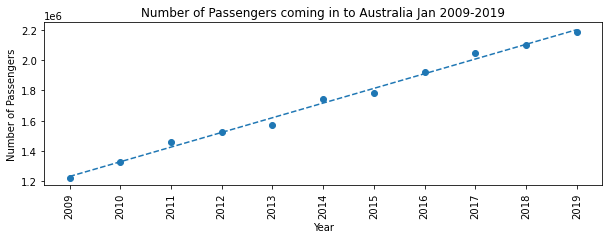

In [14]:
# scatter plot for January 2009-2019 incoming
# Plot the linear model 
year = passengers_19_jan_df.iloc[:,1]
passengers_in_jan = passengers_19_jan_df.iloc[:,2]

# Perform a linear regression on year versus passengers in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_jan)

 # Create equation of line to calculate predicted passengers in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_in_jan)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia Jan 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [15]:
# forecast the incoming passengers for 2020
year = 2020
year_2020_predict_jan_in = round(vc_slope * year + vc_int,2)
year_2020_predict_jan_in

2297257.58

Text(0, 0.5, 'Number of Passengers')

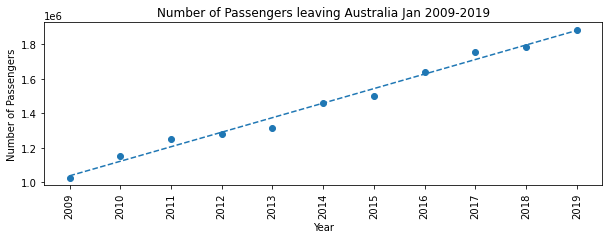

In [16]:
# scatter plot for January 2009-2019 outgoing
# Plot the linear model 
year = passengers_19_jan_df.iloc[:,1]
passengers_out_jan = passengers_19_jan_df.iloc[:,3]

# Perform a linear regression on year versus passengers out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_out_jan)

 # Create equation of line to calculate predicted passengers out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_out_jan)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers leaving Australia Jan 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [17]:
# forecast the outgoing passengers for jan 2020
year = 2020
year_2020_predict_jan_out = round(vc_slope * year + vc_int,2)
year_2020_predict_jan_out

1965344.91

In [18]:
# add predicted 2020 values to jan 2019 df
new_row = {'Month': "Jan", 'Year': 2020, 'Passengers In': year_2020_predict_jan_in, 'Passengers Out': year_2020_predict_jan_out}
#append row to the dataframe
passengers_19_jan_df = passengers_19_jan_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'Total Passengers In')

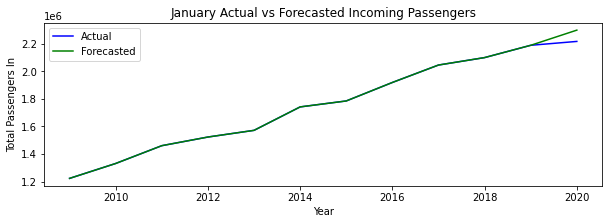

In [19]:
# plot graph showing overall expected vs real Jan values - incoming
x_jan_in_predict = passengers_19_jan_df["Year"]
y_jan_in_act = passengers_jan_df["Passengers In"]
y_jan_in_pred = passengers_19_jan_df["Passengers In"]

plt.figure(figsize=(10,3))
plt.plot(x_jan_in_predict, y_jan_in_act, label='Actual', color='blue')
plt.plot(x_jan_in_predict, y_jan_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("January Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")

Text(0, 0.5, 'Total Passengers Out')

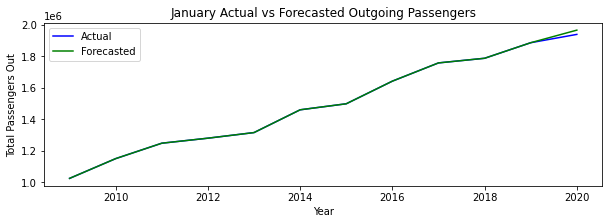

In [20]:
# plot graph showing overall expected vs real Jan values - outgoing
x_jan_out_predict = passengers_19_jan_df["Year"]
y_jan_out_act = passengers_jan_df["Passengers Out"]
y_jan_out_pred = passengers_19_jan_df["Passengers Out"]

plt.figure(figsize=(10,3))
plt.plot(x_jan_out_predict, y_jan_out_act, label='Actual', color='blue')
plt.plot(x_jan_out_predict, y_jan_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("January Actual vs Forecasted Outgoing Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers Out")

Text(0, 0.5, 'Number of Passengers')

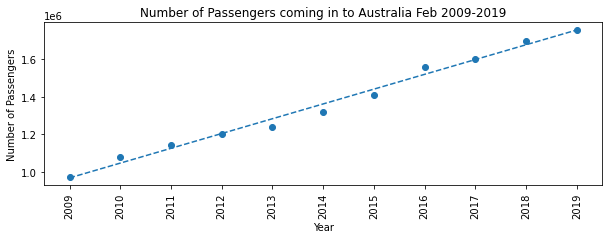

In [21]:
# scatter plot for February 2009-2019 incoming
# Plot the linear model 
year = passengers_19_feb_df.iloc[:,1]
passengers_in_feb = passengers_19_feb_df.iloc[:,2]

# Perform a linear regression on year versus passengers in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_feb)

 # Create equation of line to calculate predicted passengers in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_in_feb)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia Feb 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [22]:
# forecast the incoming passengers for 2020
year = 2020
year_2020_predict_feb_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'Number of Passengers')

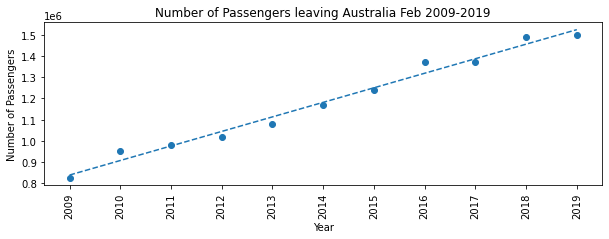

In [23]:
# scatter plot for February 2009-2019 outgoing
# Plot the linear model 
year = passengers_19_feb_df.iloc[:,1]
passengers_out_feb = passengers_19_feb_df.iloc[:,3]

# Perform a linear regression on year versus passengers out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_out_feb)

 # Create equation of line to calculate predicted passengers out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_out_feb)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers leaving Australia Feb 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [24]:
# forecast the outgoing passengers for feb 2020
year = 2020
year_2020_predict_feb_out = round(vc_slope * year + vc_int,2)

In [25]:
# add predicted 2020 values to feb 2019 df
new_row = {'Month': "Feb", 'Year': 2020, 'Passengers In': year_2020_predict_feb_in, 'Passengers Out': year_2020_predict_feb_out}
#append row to the dataframe
passengers_19_feb_df = passengers_19_feb_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'Total Passengers In')

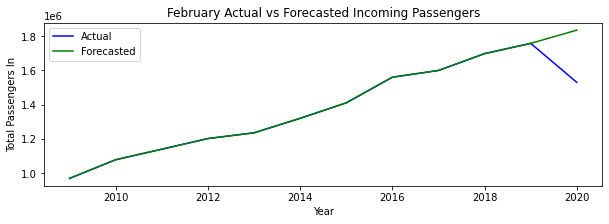

In [26]:
# plot graph showing overall expected vs real Feb values - incoming
x_feb_in_predict = passengers_19_feb_df["Year"]
y_feb_in_act = passengers_feb_df["Passengers In"]
y_feb_in_pred = passengers_19_feb_df["Passengers In"]

plt.figure(figsize=(10,3))
plt.plot(x_feb_in_predict, y_feb_in_act, label='Actual', color='blue')
plt.plot(x_feb_in_predict, y_feb_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("February Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")

Text(0, 0.5, 'Total Passengers Out')

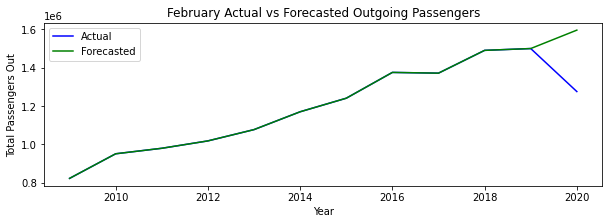

In [27]:
# plot graph showing overall expected vs real feb values - outgoing
x_feb_out_predict = passengers_19_feb_df["Year"]
y_feb_out_act = passengers_feb_df["Passengers Out"]
y_feb_out_pred = passengers_19_feb_df["Passengers Out"]

plt.figure(figsize=(10,3))
plt.plot(x_feb_out_predict, y_feb_out_act, label='Actual', color='blue')
plt.plot(x_feb_out_predict, y_feb_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("February Actual vs Forecasted Outgoing Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers Out")

Text(0, 0.5, 'Number of Passengers')

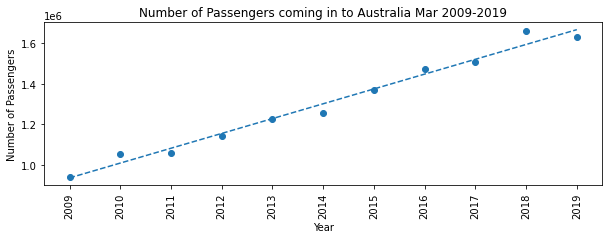

In [28]:
# scatter plot for March 2009-2019 incoming
# Plot the linear model 
year = passengers_19_mar_df.iloc[:,1]
passengers_in_mar = passengers_19_mar_df.iloc[:,2]

# Perform a linear regression on year versus passengers in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_mar)

 # Create equation of line to calculate predicted passengers in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_in_mar)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia Mar 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [29]:
# forecast the incoming passengers for 2020
year = 2020
year_2020_predict_mar_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'Number of Passengers')

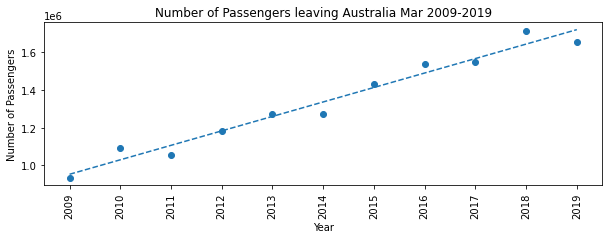

In [30]:
# scatter plot for March 2009-2019 outgoing
# Plot the linear model 
year = passengers_19_mar_df.iloc[:,1]
passengers_out_mar = passengers_19_mar_df.iloc[:,3]

# Perform a linear regression on year versus passengers out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_out_mar)

 # Create equation of line to calculate predicted passengers out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_out_mar)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers leaving Australia Mar 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [31]:
# forecast the outgoing passengers for mar 2020
year = 2020
year_2020_predict_mar_out = round(vc_slope * year + vc_int,2)

In [32]:
# add predicted 2020 values to feb 2019 df
new_row = {'Month': "mar", 'Year': 2020, 'Passengers In': year_2020_predict_mar_in, 'Passengers Out': year_2020_predict_mar_out}
#append row to the dataframe
passengers_19_mar_df = passengers_19_mar_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'Total Passengers In')

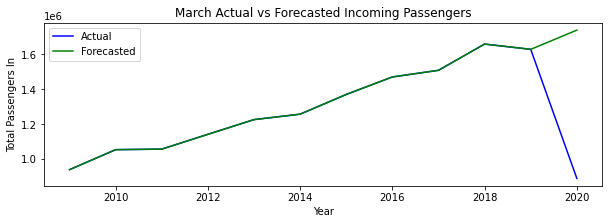

In [33]:
# plot graph showing overall expected vs real mar values - incoming
x_mar_in_predict = passengers_19_mar_df["Year"]
y_mar_in_act = passengers_mar_df["Passengers In"]
y_mar_in_pred = passengers_19_mar_df["Passengers In"]

plt.figure(figsize=(10,3))
plt.plot(x_mar_in_predict, y_mar_in_act, label='Actual', color='blue')
plt.plot(x_mar_in_predict, y_mar_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("March Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")

Text(0, 0.5, 'Total Passengers Out')

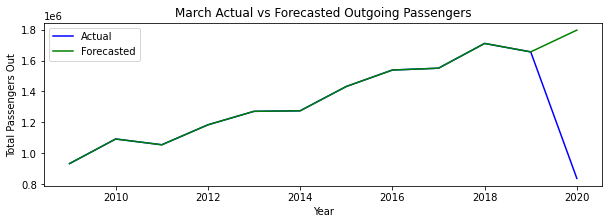

In [34]:
# plot graph showing overall expected vs real mar values - outgoing
x_mar_out_predict = passengers_19_mar_df["Year"]
y_mar_out_act = passengers_mar_df["Passengers Out"]
y_mar_out_pred = passengers_19_mar_df["Passengers Out"]

plt.figure(figsize=(10,3))
plt.plot(x_mar_out_predict, y_mar_out_act, label='Actual', color='blue')
plt.plot(x_mar_out_predict, y_mar_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("March Actual vs Forecasted Outgoing Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers Out")

Text(0, 0.5, 'Number of Passengers')

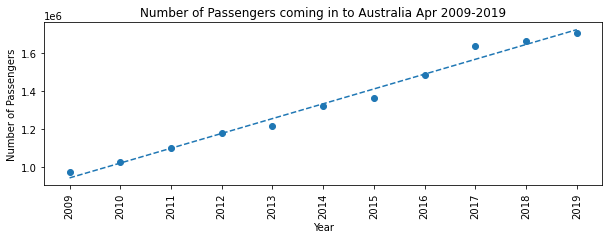

In [35]:
# scatter plot for April 2009-2019 incoming
# Plot the linear model 
year = passengers_19_apr_df.iloc[:,1]
passengers_in_apr = passengers_19_apr_df.iloc[:,2]

# Perform a linear regression on year versus passengers in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_apr)

 # Create equation of line to calculate predicted passengers in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_in_apr)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia Apr 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [36]:
# forecast the incoming passengers for 2020
year = 2020
year_2020_predict_apr_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'Number of Passengers')

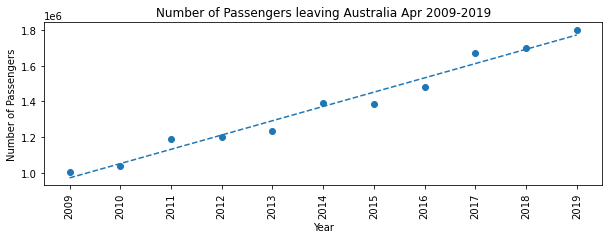

In [37]:
# scatter plot for April 2009-2019 outgoing
# Plot the linear model 
year = passengers_19_apr_df.iloc[:,1]
passengers_out_apr = passengers_19_apr_df.iloc[:,3]

# Perform a linear regression on year versus passengers out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_out_apr)

 # Create equation of line to calculate predicted passengers out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_out_apr)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers leaving Australia Apr 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [38]:
# forecast the outgoing passengers for feb 2020
year = 2020
year_2020_predict_apr_out = round(vc_slope * year + vc_int,2)

In [39]:
# add predicted 2020 values to apr 2019 df
new_row = {'Month': "Apr", 'Year': 2020, 'Passengers In': year_2020_predict_apr_in, 'Passengers Out': year_2020_predict_apr_out}
#append row to the dataframe
passengers_19_apr_df = passengers_19_apr_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'Total Passengers In')

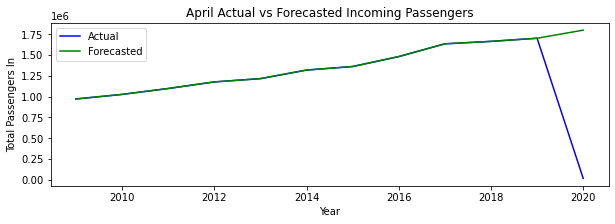

In [40]:
# plot graph showing overall expected vs real apr values - incoming
x_apr_in_predict = passengers_19_apr_df["Year"]
y_apr_in_act = passengers_apr_df["Passengers In"]
y_apr_in_pred = passengers_19_apr_df["Passengers In"]

plt.figure(figsize=(10,3))
plt.plot(x_apr_in_predict, y_apr_in_act, label='Actual', color='blue')
plt.plot(x_apr_in_predict, y_apr_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("April Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")

Text(0, 0.5, 'Total Passengers Out')

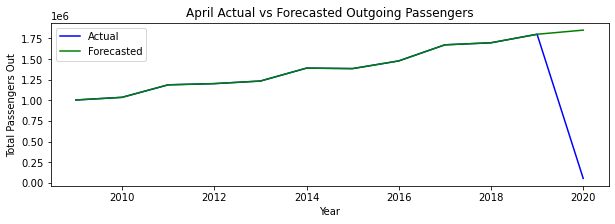

In [41]:
# plot graph showing overall expected vs real apr values - outgoing
x_apr_out_predict = passengers_19_apr_df["Year"]
y_apr_out_act = passengers_apr_df["Passengers Out"]
y_apr_out_pred = passengers_19_apr_df["Passengers Out"]

plt.figure(figsize=(10,3))
plt.plot(x_apr_out_predict, y_apr_out_act, label='Actual', color='blue')
plt.plot(x_apr_out_predict, y_apr_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("April Actual vs Forecasted Outgoing Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers Out")

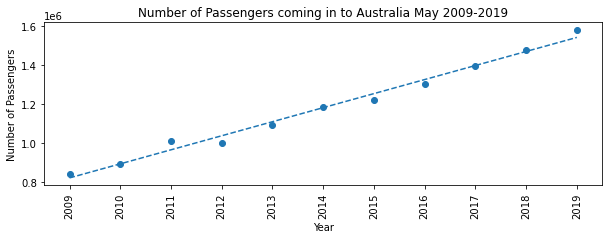

In [42]:
# scatter plot for May 2009-2019 incoming
# Plot the linear model 
year = passengers_19_may_df.iloc[:,1]
passengers_in_may = passengers_19_may_df.iloc[:,2]

# Perform a linear regression on year versus passengers in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_may)

 # Create equation of line to calculate predicted passengers in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_in_may)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia May 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.savefig('../images/pax_in_trend.png')

In [43]:
# forecast the incoming passengers for 2020
year = 2020
year_2020_predict_may_in = round(vc_slope * year + vc_int,2)

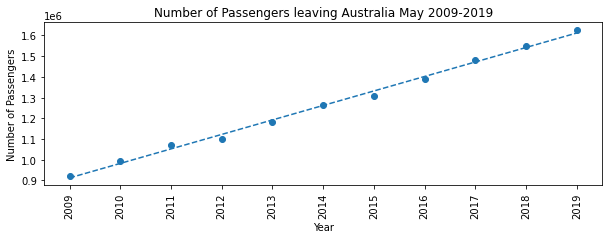

In [44]:
# scatter plot for May 2009-2019 outgoing
# Plot the linear model 
year = passengers_19_may_df.iloc[:,1]
passengers_out_may = passengers_19_may_df.iloc[:,3]

# Perform a linear regression on year versus passengers out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_out_may)

 # Create equation of line to calculate predicted passengers out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_out_may)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers leaving Australia May 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.savefig('../images/pax_out_trend.png')

In [45]:
# forecast the outgoing passengers for may 2020
year = 2020
year_2020_predict_may_out = round(vc_slope * year + vc_int,2)

In [46]:
# add predicted 2020 values to may 2019 df
new_row = {'Month': "May", 'Year': 2020, 'Passengers In': year_2020_predict_may_in, 'Passengers Out': year_2020_predict_may_out}
#append row to the dataframe
passengers_19_may_df = passengers_19_may_df.append(new_row, ignore_index=True)

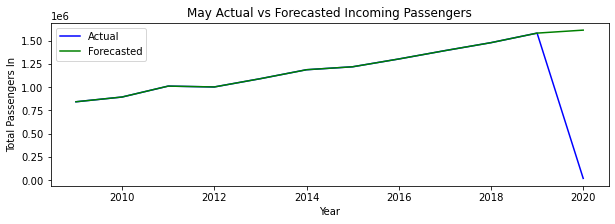

In [47]:
# plot graph showing overall expected vs real May values - incoming
x_may_in_predict = passengers_19_may_df["Year"]
y_may_in_act = passengers_may_df["Passengers In"]
y_may_in_pred = passengers_19_may_df["Passengers In"]

plt.figure(figsize=(10,3))
plt.plot(x_may_in_predict, y_may_in_act, label='Actual', color='blue')
plt.plot(x_may_in_predict, y_may_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("May Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")
plt.savefig('../images/pax_in_actual_vs_predicted.png')

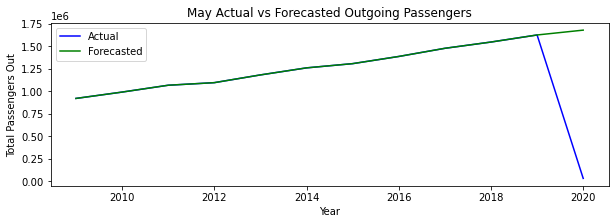

In [48]:
# plot graph showing overall expected vs real may values - outgoing
x_may_out_predict = passengers_19_may_df["Year"]
y_may_out_act = passengers_may_df["Passengers Out"]
y_may_out_pred = passengers_19_may_df["Passengers Out"]

plt.figure(figsize=(10,3))
plt.plot(x_may_out_predict, y_may_out_act, label='Actual', color='blue')
plt.plot(x_may_out_predict, y_may_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("May Actual vs Forecasted Outgoing Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers Out")
plt.savefig('../images/pax_out_actual_vs_forecasted.png')

Text(0, 0.5, 'Number of Passengers')

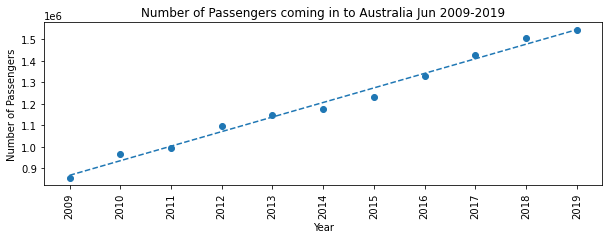

In [49]:
# scatter plot for June 2009-2019 incoming
# Plot the linear model 
year = passengers_19_jun_df.iloc[:,1]
passengers_in_jun = passengers_19_jun_df.iloc[:,2]

# Perform a linear regression on year versus passengers in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_jun)

 # Create equation of line to calculate predicted passengers in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_in_jun)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia Jun 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [50]:
# forecast the incoming passengers for 2020
year = 2020
year_2020_predict_jun_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'Number of Passengers')

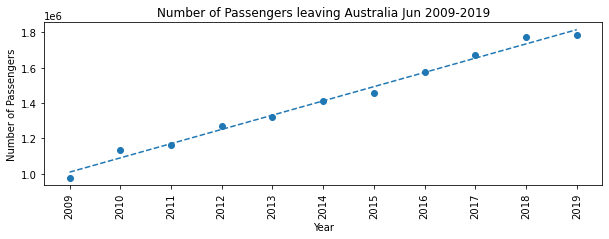

In [51]:
# scatter plot for June 2009-2019 outgoing
# Plot the linear model 
year = passengers_19_jun_df.iloc[:,1]
passengers_out_jun = passengers_19_jun_df.iloc[:,3]

# Perform a linear regression on year versus passengers out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_out_jun)

 # Create equation of line to calculate predicted passengers out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_out_jun)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers leaving Australia Jun 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [52]:
# forecast the outgoing passengers for jun 2020
year = 2020
year_2020_predict_jun_out = round(vc_slope * year + vc_int,2)

In [53]:
# add predicted 2020 values to jun 2019 df
new_row = {'Month': "Jun", 'Year': 2020, 'Passengers In': year_2020_predict_jun_in, 'Passengers Out': year_2020_predict_jun_out}
#append row to the dataframe
passengers_19_jun_df = passengers_19_jun_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'Total Passengers In')

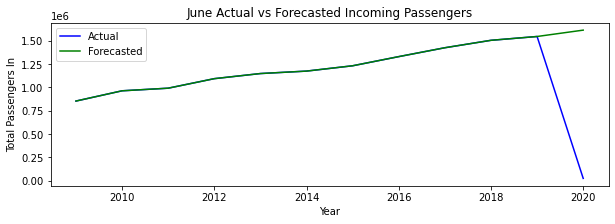

In [54]:
# plot graph showing overall expected vs real Jun values - incoming
x_jun_in_predict = passengers_19_jun_df["Year"]
y_jun_in_act = passengers_jun_df["Passengers In"]
y_jun_in_pred = passengers_19_jun_df["Passengers In"]

plt.figure(figsize=(10,3))
plt.plot(x_jun_in_predict, y_jun_in_act, label='Actual', color='blue')
plt.plot(x_jun_in_predict, y_jun_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("June Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")

Text(0, 0.5, 'Total Passengers Out')

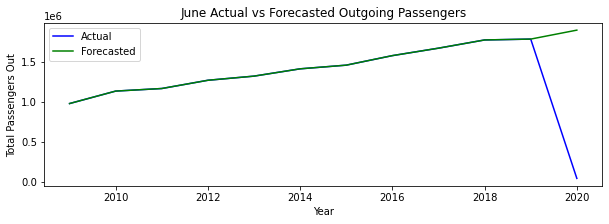

In [55]:
# plot graph showing overall expected vs real jun values - outgoing
x_jun_out_predict = passengers_19_jun_df["Year"]
y_jun_out_act = passengers_jun_df["Passengers Out"]
y_jun_out_pred = passengers_19_jun_df["Passengers Out"]

plt.figure(figsize=(10,3))
plt.plot(x_jun_out_predict, y_jun_out_act, label='Actual', color='blue')
plt.plot(x_jun_out_predict, y_jun_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("June Actual vs Forecasted Outgoing Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers Out")

Text(0, 0.5, 'Number of Passengers')

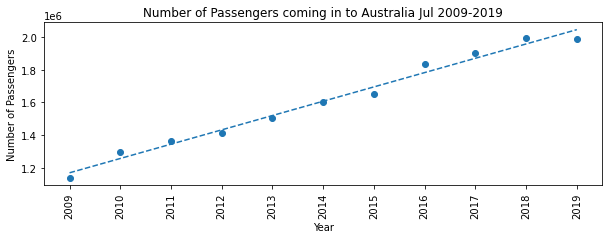

In [56]:
# scatter plot for July 2009-2019 incoming
# Plot the linear model 
year = passengers_19_jul_df.iloc[:,1]
passengers_in_jul = passengers_19_jul_df.iloc[:,2]

# Perform a linear regression on year versus passengers in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_jul)

 # Create equation of line to calculate predicted passengers in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_in_jul)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia Jul 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [57]:
# forecast the incoming passengers for 2020
year = 2020
year_2020_predict_jul_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'Number of Passengers')

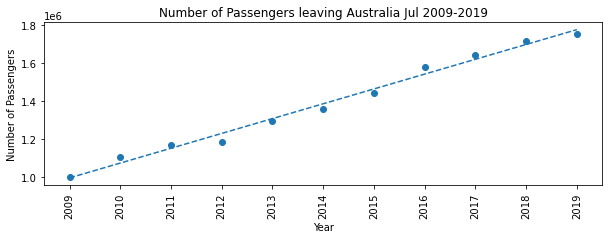

In [58]:
# scatter plot for July 2009-2019 outgoing
# Plot the linear model 
year = passengers_19_jul_df.iloc[:,1]
passengers_out_jul = passengers_19_jul_df.iloc[:,3]

# Perform a linear regression on year versus passengers out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_out_jul)

 # Create equation of line to calculate predicted passengers out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_out_jul)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers leaving Australia Jul 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [59]:
# forecast the outgoing passengers for jul 2020
year = 2020
year_2020_predict_jul_out = round(vc_slope * year + vc_int,2)

In [60]:
# add predicted 2020 values to jul 2019 df
new_row = {'Month': "Jul", 'Year': 2020, 'Passengers In': year_2020_predict_jul_in, 'Passengers Out': year_2020_predict_jul_out}
#append row to the dataframe
passengers_19_jul_df = passengers_19_jul_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'Total Passengers In')

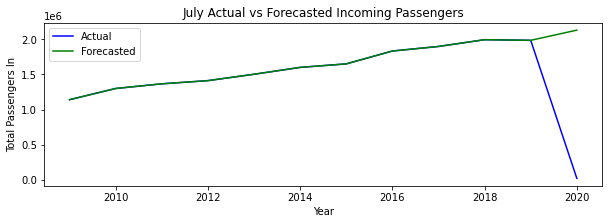

In [61]:
# plot graph showing overall expected vs real Jul values - incoming
x_jul_in_predict = passengers_19_jul_df["Year"]
y_jul_in_act = passengers_jul_df["Passengers In"]
y_jul_in_pred = passengers_19_jul_df["Passengers In"]

plt.figure(figsize=(10,3))
plt.plot(x_jul_in_predict, y_jul_in_act, label='Actual', color='blue')
plt.plot(x_jul_in_predict, y_jul_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("July Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")

Text(0, 0.5, 'Total Passengers Out')

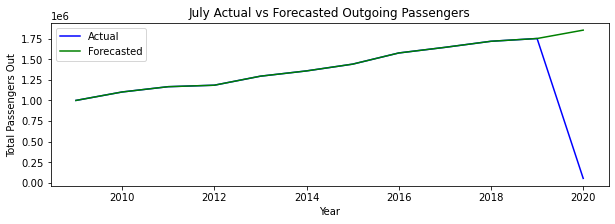

In [62]:
# plot graph showing overall expected vs real jul values - outgoing
x_jul_out_predict = passengers_19_jul_df["Year"]
y_jul_out_act = passengers_jul_df["Passengers Out"]
y_jul_out_pred = passengers_19_jul_df["Passengers Out"]

plt.figure(figsize=(10,3))
plt.plot(x_jul_out_predict, y_jul_out_act, label='Actual', color='blue')
plt.plot(x_jul_out_predict, y_jul_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("July Actual vs Forecasted Outgoing Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers Out")

Text(0, 0.5, 'Number of Passengers')

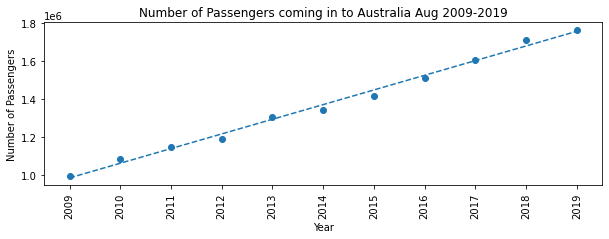

In [63]:
# scatter plot for August 2009-2019 incoming
# Plot the linear model 
year = passengers_19_aug_df.iloc[:,1]
passengers_in_aug = passengers_19_aug_df.iloc[:,2]

# Perform a linear regression on year versus passengers in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_aug)

 # Create equation of line to calculate predicted passengers in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_in_aug)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia Aug 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [64]:
# forecast the incoming passengers for 2020
year = 2020
year_2020_predict_aug_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'Number of Passengers')

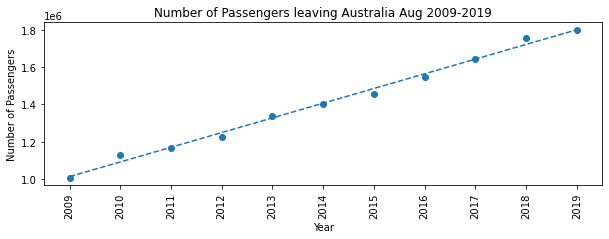

In [65]:
# scatter plot for August 2009-2019 outgoing
# Plot the linear model 
year = passengers_19_aug_df.iloc[:,1]
passengers_out_aug = passengers_19_aug_df.iloc[:,3]

# Perform a linear regression on year versus passengers out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_out_aug)

 # Create equation of line to calculate predicted passengers out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_out_aug)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers leaving Australia Aug 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [66]:
# forecast the outgoing passengers for aug 2020
year = 2020
year_2020_predict_aug_out = round(vc_slope * year + vc_int,2)

In [67]:
# add predicted 2020 values to aug 2019 df
new_row = {'Month': "Aug", 'Year': 2020, 'Passengers In': year_2020_predict_aug_in, 'Passengers Out': year_2020_predict_aug_out}
#append row to the dataframe
passengers_19_aug_df = passengers_19_aug_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'Total Passengers In')

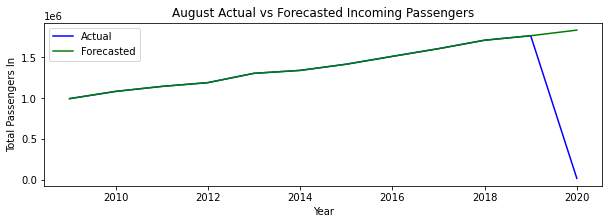

In [68]:
# plot graph showing overall expected vs real Aug values - incoming
x_aug_in_predict = passengers_19_aug_df["Year"]
y_aug_in_act = passengers_aug_df["Passengers In"]
y_aug_in_pred = passengers_19_aug_df["Passengers In"]

plt.figure(figsize=(10,3))
plt.plot(x_aug_in_predict, y_aug_in_act, label='Actual', color='blue')
plt.plot(x_aug_in_predict, y_aug_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("August Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")

Text(0, 0.5, 'Total Passengers Out')

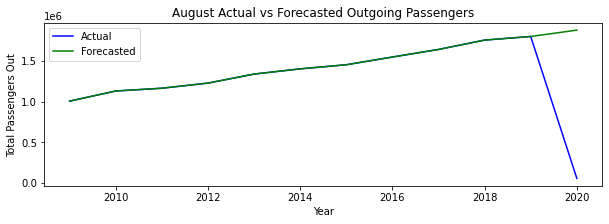

In [69]:
# plot graph showing overall expected vs real aug values - outgoing
x_aug_out_predict = passengers_19_aug_df["Year"]
y_aug_out_act = passengers_aug_df["Passengers Out"]
y_aug_out_pred = passengers_19_aug_df["Passengers Out"]

plt.figure(figsize=(10,3))
plt.plot(x_aug_out_predict, y_aug_out_act, label='Actual', color='blue')
plt.plot(x_aug_out_predict, y_aug_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("August Actual vs Forecasted Outgoing Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers Out")

Text(0, 0.5, 'Number of Passengers')

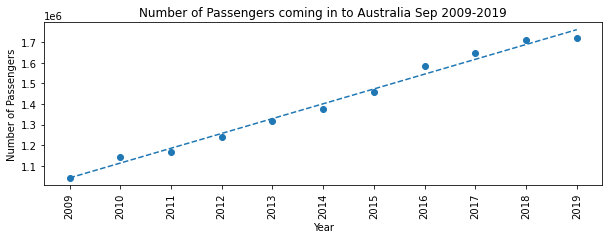

In [70]:
# scatter plot for September 2009-2019 incoming
# Plot the linear model 
year = passengers_19_sep_df.iloc[:,1]
passengers_in_sep = passengers_19_sep_df.iloc[:,2]

# Perform a linear regression on year versus passengers in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_sep)

 # Create equation of line to calculate predicted passengers in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_in_sep)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia Sep 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [71]:
# forecast the incoming passengers for 2020
year = 2020
year_2020_predict_sep_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'Number of Passengers')

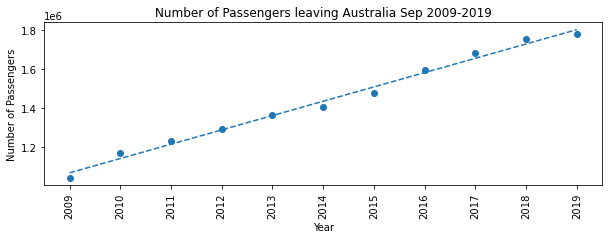

In [72]:
# scatter plot for September 2009-2019 outgoing
# Plot the linear model 
year = passengers_19_sep_df.iloc[:,1]
passengers_out_sep = passengers_19_sep_df.iloc[:,3]

# Perform a linear regression on year versus passengers out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_out_sep)

 # Create equation of line to calculate predicted passengers out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_out_sep)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers leaving Australia Sep 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [73]:
# forecast the outgoing passengers for sep 2020
year = 2020
year_2020_predict_sep_out = round(vc_slope * year + vc_int,2)

In [74]:
# add predicted 2020 values to sep 2019 df
new_row = {'Month': "Sep", 'Year': 2020, 'Passengers In': year_2020_predict_sep_in, 'Passengers Out': year_2020_predict_sep_out}
#append row to the dataframe
passengers_19_sep_df = passengers_19_sep_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'Total Passengers In')

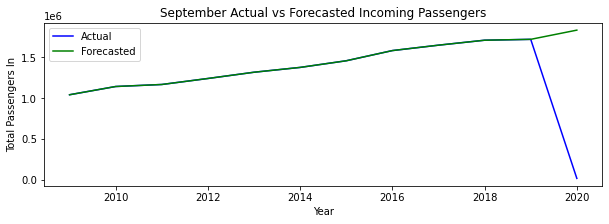

In [75]:
# plot graph showing overall expected vs real Sep values - incoming
x_sep_in_predict = passengers_19_sep_df["Year"]
y_sep_in_act = passengers_sep_df["Passengers In"]
y_sep_in_pred = passengers_19_sep_df["Passengers In"]

plt.figure(figsize=(10,3))
plt.plot(x_sep_in_predict, y_sep_in_act, label='Actual', color='blue')
plt.plot(x_sep_in_predict, y_sep_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("September Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")

Text(0, 0.5, 'Total Passengers Out')

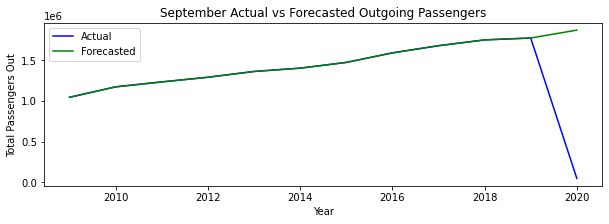

In [76]:
# plot graph showing overall expected vs real sep values - outgoing
x_sep_out_predict = passengers_19_sep_df["Year"]
y_sep_out_act = passengers_sep_df["Passengers Out"]
y_sep_out_pred = passengers_19_sep_df["Passengers Out"]

plt.figure(figsize=(10,3))
plt.plot(x_sep_out_predict, y_sep_out_act, label='Actual', color='blue')
plt.plot(x_sep_out_predict, y_sep_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("September Actual vs Forecasted Outgoing Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers Out")

Text(0, 0.5, 'Number of Passengers')

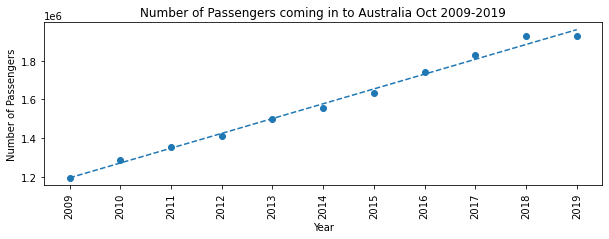

In [77]:
# scatter plot for October 2009-2019 incoming
# Plot the linear model 
year = passengers_19_oct_df.iloc[:,1]
passengers_in_oct = passengers_19_oct_df.iloc[:,2]

# Perform a linear regression on year versus passengers in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_oct)

 # Create equation of line to calculate predicted passengers in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_in_oct)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia Oct 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [78]:
# forecast the incoming passengers for 2020
year = 2020
year_2020_predict_oct_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'Number of Passengers')

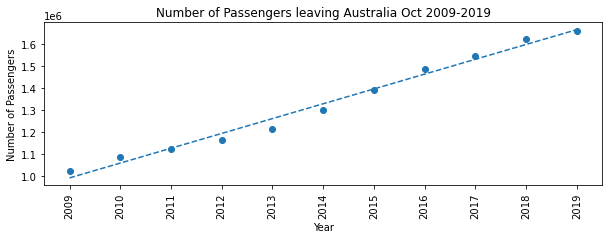

In [79]:
# scatter plot for October 2009-2019 outgoing
# Plot the linear model 
year = passengers_19_oct_df.iloc[:,1]
passengers_out_oct = passengers_19_oct_df.iloc[:,3]

# Perform a linear regression on year versus passengers out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_out_oct)

 # Create equation of line to calculate predicted passengers out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_out_oct)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers leaving Australia Oct 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [80]:
# forecast the outgoing passengers for oct 2020
year = 2020
year_2020_predict_oct_out = round(vc_slope * year + vc_int,2)

In [81]:
# add predicted 2020 values to oct 2019 df
new_row = {'Month': "Oct", 'Year': 2020, 'Passengers In': year_2020_predict_oct_in, 'Passengers Out': year_2020_predict_oct_out}
#append row to the dataframe
passengers_19_oct_df = passengers_19_oct_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'Total Passengers In')

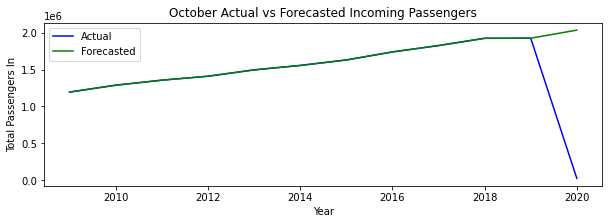

In [82]:
# plot graph showing overall expected vs real Oct values - incoming
x_oct_in_predict = passengers_19_oct_df["Year"]
y_oct_in_act = passengers_oct_df["Passengers In"]
y_oct_in_pred = passengers_19_oct_df["Passengers In"]

plt.figure(figsize=(10,3))
plt.plot(x_oct_in_predict, y_oct_in_act, label='Actual', color='blue')
plt.plot(x_oct_in_predict, y_oct_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("October Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")

Text(0, 0.5, 'Total Passengers Out')

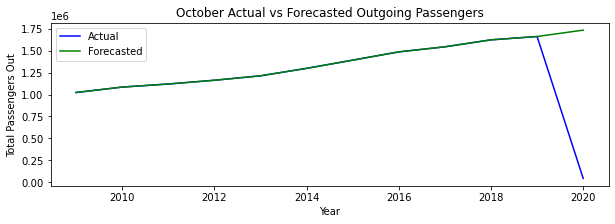

In [83]:
# plot graph showing overall expected vs real oct values - outgoing
x_oct_out_predict = passengers_19_oct_df["Year"]
y_oct_out_act = passengers_oct_df["Passengers Out"]
y_oct_out_pred = passengers_19_oct_df["Passengers Out"]

plt.figure(figsize=(10,3))
plt.plot(x_oct_out_predict, y_oct_out_act, label='Actual', color='blue')
plt.plot(x_oct_out_predict, y_oct_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("October Actual vs Forecasted Outgoing Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers Out")

Text(0, 0.5, 'Number of Passengers')

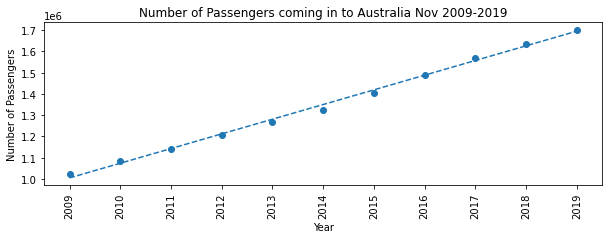

In [84]:
# scatter plot for November 2009-2019 incoming
# Plot the linear model 
year = passengers_19_nov_df.iloc[:,1]
passengers_in_nov = passengers_19_nov_df.iloc[:,2]

# Perform a linear regression on year versus passengers in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_nov)

 # Create equation of line to calculate predicted passengers in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_in_nov)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia Nov 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [85]:
# forecast the incoming passengers for 2020
year = 2020
year_2020_predict_nov_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'Number of Passengers')

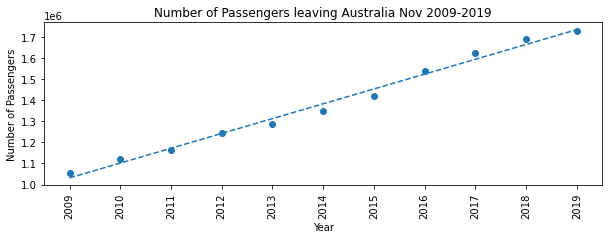

In [86]:
# scatter plot for November 2009-2019 outgoing
# Plot the linear model 
year = passengers_19_nov_df.iloc[:,1]
passengers_out_nov = passengers_19_nov_df.iloc[:,3]

# Perform a linear regression on year versus passengers out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_out_nov)

 # Create equation of line to calculate predicted passengers out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_out_nov)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers leaving Australia Nov 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [87]:
# forecast the outgoing passengers for nov 2020
year = 2020
year_2020_predict_nov_out = round(vc_slope * year + vc_int,2)

In [88]:
# add predicted 2020 values to nov 2019 df
new_row = {'Month': "Nov", 'Year': 2020, 'Passengers In': year_2020_predict_nov_in, 'Passengers Out': year_2020_predict_nov_out}
#append row to the dataframe
passengers_19_nov_df = passengers_19_nov_df.append(new_row, ignore_index=True)

Text(0, 0.5, 'Total Passengers In')

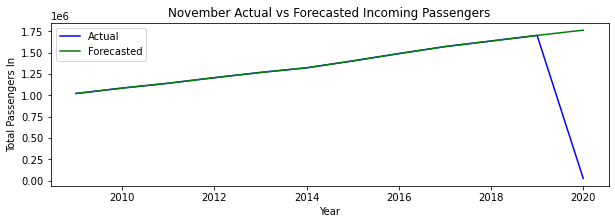

In [89]:
# plot graph showing overall expected vs real Nov values - incoming
x_nov_in_predict = passengers_19_nov_df["Year"]
y_nov_in_act = passengers_nov_df["Passengers In"]
y_nov_in_pred = passengers_19_nov_df["Passengers In"]

plt.figure(figsize=(10,3))
plt.plot(x_nov_in_predict, y_nov_in_act, label='Actual', color='blue')
plt.plot(x_nov_in_predict, y_nov_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("November Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")

Text(0, 0.5, 'Total Passengers Out')

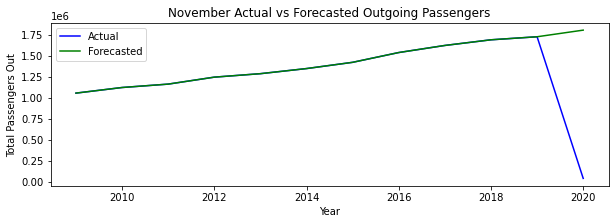

In [90]:
# plot graph showing overall expected vs real nov values - outgoing
x_nov_out_predict = passengers_19_nov_df["Year"]
y_nov_out_act = passengers_nov_df["Passengers Out"]
y_nov_out_pred = passengers_19_nov_df["Passengers Out"]

plt.figure(figsize=(10,3))
plt.plot(x_nov_out_predict, y_nov_out_act, label='Actual', color='blue')
plt.plot(x_nov_out_predict, y_nov_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("November Actual vs Forecasted Outgoing Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers Out")

Text(0, 0.5, 'Number of Passengers')

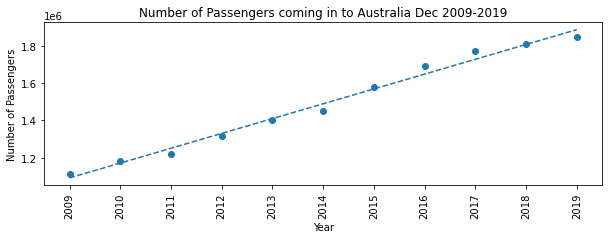

In [91]:
# scatter plot for December 2009-2019 incoming
# Plot the linear model 
year = passengers_19_dec_df.iloc[:,1]
passengers_in_dec = passengers_19_dec_df.iloc[:,2]

# Perform a linear regression on year versus passengers in
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_in_dec)

 # Create equation of line to calculate predicted passengers in
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_in_dec)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers coming in to Australia Dec 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [92]:
# forecast the incoming passengers for 2020
year = 2020
year_2020_predict_dec_in = round(vc_slope * year + vc_int,2)

Text(0, 0.5, 'Number of Passengers')

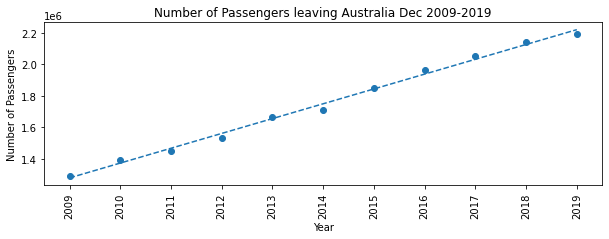

In [93]:
# scatter plot for December 2009-2019 outgoing
# Plot the linear model 
year = passengers_19_dec_df.iloc[:,1]
passengers_out_dec = passengers_19_dec_df.iloc[:,3]

# Perform a linear regression on year versus passengers out
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, passengers_out_dec)

 # Create equation of line to calculate predicted passengers out
vc_fit = vc_slope * year + vc_int

plt.figure(figsize=(10,3))
plt.scatter(year,passengers_out_dec)
plt.plot(year,vc_fit,"--")
plt.xticks(year, rotation=90)
plt.title("Number of Passengers leaving Australia Dec 2009-2019")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

In [94]:
# forecast the outgoing passengers for dec 2020
year = 2020
year_2020_predict_dec_out = round(vc_slope * year + vc_int,2)

In [95]:
# add predicted 2020 values to dec 2019 df
new_row = {'Month': "Dec", 'Year': 2020, 'Passengers In': year_2020_predict_dec_in, 'Passengers Out': year_2020_predict_dec_out}
#append row to the dataframe
passengers_19_dec_df = passengers_19_dec_df.append(new_row, ignore_index=True)

In [96]:
# manually add december actual value from "Citizenship_Dec20_passengers" spreadsheet
december_placeholder = {'Month': "Dec", 'Year': 2020, 'Passengers In': 35120, 'Passengers Out': 49940}
#append row to the dataframe
passengers_dec_df = passengers_dec_df.append(december_placeholder, ignore_index=True)

Text(0, 0.5, 'Total Passengers In')

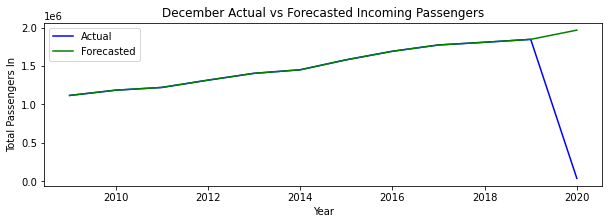

In [97]:
# plot graph showing overall expected vs real Dec values - incoming
x_dec_in_predict = passengers_19_dec_df["Year"]
y_dec_in_act = passengers_dec_df["Passengers In"]
y_dec_in_pred = passengers_19_dec_df["Passengers In"]

plt.figure(figsize=(10,3))
plt.plot(x_dec_in_predict, y_dec_in_act, label='Actual', color='blue')
plt.plot(x_dec_in_predict, y_dec_in_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("December Actual vs Forecasted Incoming Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers In")

Text(0, 0.5, 'Total Passengers Out')

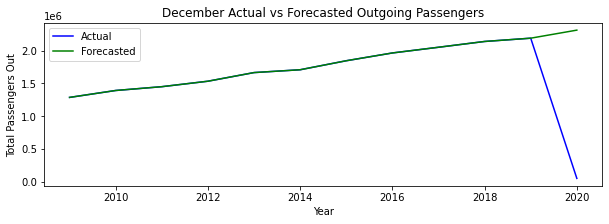

In [98]:
# plot graph showing overall expected vs real dec values - outgoing
x_dec_out_predict = passengers_19_dec_df["Year"]
y_dec_out_act = passengers_dec_df["Passengers Out"]
y_dec_out_pred = passengers_19_dec_df["Passengers Out"]

plt.figure(figsize=(10,3))
plt.plot(x_dec_out_predict, y_dec_out_act, label='Actual', color='blue')
plt.plot(x_dec_out_predict, y_dec_out_pred, label='Forecasted', color='green')
plt.rcParams["figure.figsize"] = (12,7)
plt.legend()
plt.title("December Actual vs Forecasted Outgoing Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers Out")

In [99]:
# All actual passenger data
all_actual_dfs = [passengers_jan_df, passengers_feb_df, passengers_mar_df, passengers_apr_df, passengers_may_df, passengers_jun_df, passengers_jul_df, passengers_aug_df, passengers_sep_df, passengers_oct_df, passengers_nov_df, passengers_dec_df]

In [100]:
# create df
passenger_total_data_df = pd.concat(all_actual_dfs).reset_index(drop=True)
passenger_total_data_df = passenger_total_data_df.sort_values(by=['Year','Month']).reset_index()
del passenger_total_data_df['index']
passenger_total_data_df

,Month,Year,Passengers In,Passengers Out
0,Apr,2009,971404.0,1004204.0
1,Aug,2009,994466.0,1005333.0
2,Dec,2009,1115592.0,1287447.0
3,Feb,2009,969607.0,823540.0
4,Jan,2009,1223419.0,1025778.0
...,...,...,...,...
139,Mar,2020,887482.0,838247.0
140,May,2020,18664.0,33511.0
141,Nov,2020,26167.0,41026.0
142,Oct,2020,23559.0,44951.0


In [101]:
# combine all forecasted passenger value graphs for final plot
all_forecasted_dfs = [passengers_19_jan_df, passengers_19_feb_df, passengers_19_mar_df, passengers_19_apr_df, passengers_19_may_df, passengers_19_jun_df, passengers_19_jul_df, passengers_19_aug_df, passengers_19_sep_df, passengers_19_oct_df, passengers_19_nov_df, passengers_19_dec_df]

In [102]:
# create df
passenger_total_forecast_data_df = pd.concat(all_forecasted_dfs).reset_index(drop=True)
passenger_total_forecast_data_df = passenger_total_forecast_data_df.sort_values(by=['Year','Month']).reset_index()
del passenger_total_forecast_data_df['index']
passenger_total_forecast_data_df.head()

,Month,Year,Passengers In,Passengers Out
0,Apr,2009,971404.0,1004204.0
1,Aug,2009,994466.0,1005333.0
2,Dec,2009,1115592.0,1287447.0
3,Feb,2009,969607.0,823540.0
4,Jan,2009,1223419.0,1025778.0


In [103]:
# strip 2020 values only
predicted_passenger_df = passenger_total_forecast_data_df.loc[passenger_total_forecast_data_df['Year'] == 2020]
predicted_passenger_df

,Month,Year,Passengers In,Passengers Out
132,Apr,2020,1799234.45,1851362.27
133,Aug,2020,1835544.65,1880275.62
134,Dec,2020,1966373.40,2315507.09
135,Feb,2020,1834809.18,1595104.24
136,Jan,2020,2297257.58,1965344.91
137,Jul,2020,2130209.75,1852129.64
138,Jun,2020,1613894.49,1894956.09
139,May,2020,1611941.47,1681781.22
140,Nov,2020,1764433.31,1802751.38
141,Oct,2020,2036404.36,1733021.55


In [104]:
# Create an overall date column
# As the data provides year and month, we need a full data for matplotlib to play nice
# Assuming 1st of month for sake of plotting
passenger_total_data_df['Date'] = '01/' + passenger_total_data_df['Month'].map(str)+ '/' +passenger_total_data_df['Year'].map(str)
passenger_total_data_df['Date'] = pd.to_datetime(passenger_total_data_df['Date'], format='%d/%b/%Y', errors='coerce')
passenger_total_data_df
predicted_passenger_df['Date'] = '01/' + predicted_passenger_df['Month'].map(str)+ '/' +predicted_passenger_df['Year'].map(str)
predicted_passenger_df['Date'] = pd.to_datetime(predicted_passenger_df['Date'], format='%d/%b/%Y', errors='coerce')
predicted_passenger_df

,Month,Year,Passengers In,Passengers Out,Date
132,Apr,2020,1799234.45,1851362.27,2020-04-01
133,Aug,2020,1835544.65,1880275.62,2020-08-01
134,Dec,2020,1966373.40,2315507.09,2020-12-01
135,Feb,2020,1834809.18,1595104.24,2020-02-01
136,Jan,2020,2297257.58,1965344.91,2020-01-01
137,Jul,2020,2130209.75,1852129.64,2020-07-01
138,Jun,2020,1613894.49,1894956.09,2020-06-01
139,May,2020,1611941.47,1681781.22,2020-05-01
140,Nov,2020,1764433.31,1802751.38,2020-11-01
141,Oct,2020,2036404.36,1733021.55,2020-10-01


In [105]:
# Need to sort and remove index otherwise the final graph gets funky
predicted_passenger_df = predicted_passenger_df.sort_values(by=['Date','Year','Month']).reset_index()
del predicted_passenger_df['index']
predicted_passenger_df

,Month,Year,Passengers In,Passengers Out,Date
0,Jan,2020,2297257.58,1965344.91,2020-01-01
1,Feb,2020,1834809.18,1595104.24,2020-02-01
2,mar,2020,1740064.44,1796295.16,2020-03-01
3,Apr,2020,1799234.45,1851362.27,2020-04-01
4,May,2020,1611941.47,1681781.22,2020-05-01
5,Jun,2020,1613894.49,1894956.09,2020-06-01
6,Jul,2020,2130209.75,1852129.64,2020-07-01
7,Aug,2020,1835544.65,1880275.62,2020-08-01
8,Sep,2020,1834397.84,1872301.95,2020-09-01
9,Oct,2020,2036404.36,1733021.55,2020-10-01


In [106]:
# Sort and index or the final graph gets funky
passenger_total_data_df = passenger_total_data_df.sort_values(by=['Date']).reset_index()
del passenger_total_data_df['index']
passenger_total_data_df

,Month,Year,Passengers In,Passengers Out,Date
0,Jan,2009,1223419.0,1025778.0,2009-01-01
1,Feb,2009,969607.0,823540.0,2009-02-01
2,Mar,2009,937697.0,933843.0,2009-03-01
3,Apr,2009,971404.0,1004204.0,2009-04-01
4,May,2009,842073.0,922435.0,2009-05-01
...,...,...,...,...,...
139,Aug,2020,15511.0,53564.0,2020-08-01
140,Sep,2020,15170.0,46163.0,2020-09-01
141,Oct,2020,23559.0,44951.0,2020-10-01
142,Nov,2020,26167.0,41026.0,2020-11-01


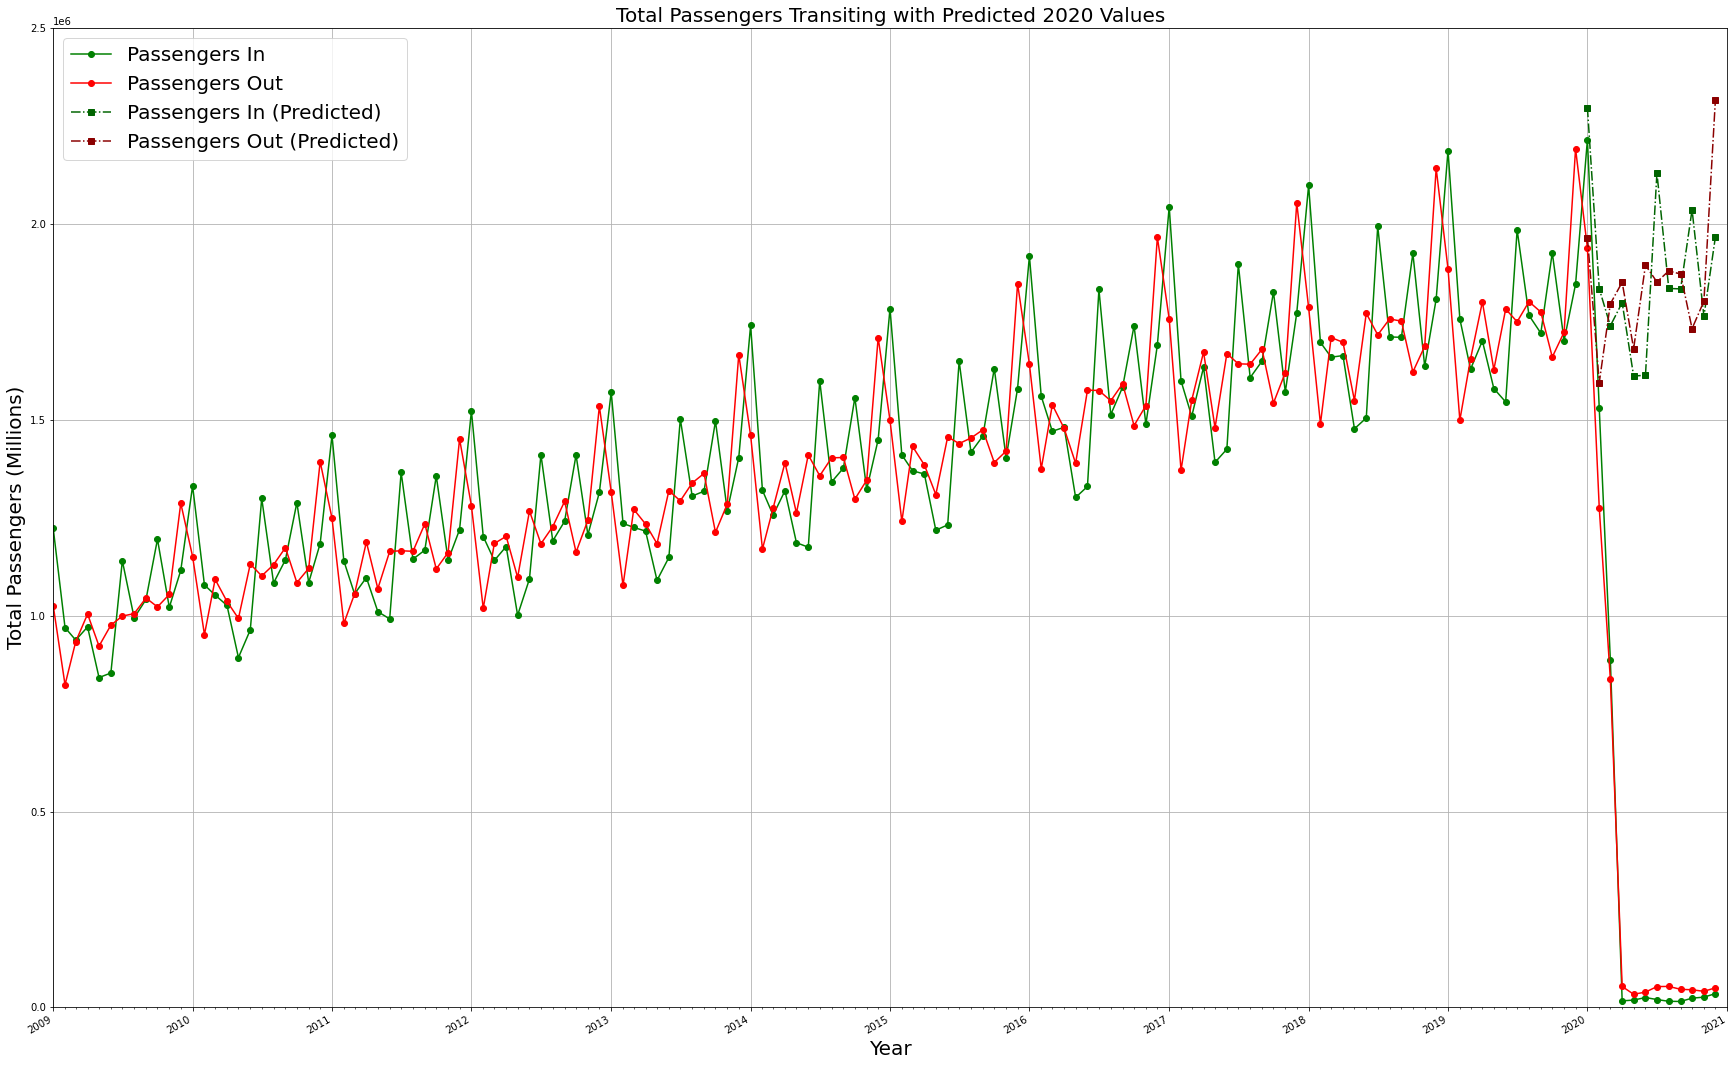

In [110]:
# Plotting everything on the same graph to just understand what's going on
# Freight is so huge it makes everything look like nothing
# This was mainly a test to make sure that I can get everything plotted nicely without the x-axes looking super confusing

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y') # Formatting like this because stack overflow says this is how it be prettier

fig, ax = plt.subplots(figsize=(30,20))

ax.plot(passenger_total_data_df['Date'], passenger_total_data_df['Passengers In'],marker='o',linestyle='-',color='g',label='Passengers In')
ax.plot(passenger_total_data_df['Date'], passenger_total_data_df['Passengers Out'],marker='o',linestyle='-',color='r',label='Passengers Out')
ax.plot(predicted_passenger_df['Date'], predicted_passenger_df['Passengers In'],marker='s',linestyle='-.',color='darkgreen',label='Passengers In (Predicted)')
ax.plot(predicted_passenger_df['Date'], predicted_passenger_df['Passengers Out'],marker='s',linestyle='-.',color='darkred',label='Passengers Out (Predicted)')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
lastdate = passenger_total_data_df['Date'][len(passenger_total_data_df['Date'])-1]
datemin = np.datetime64(passenger_total_data_df['Date'][0], 'Y')
datemax = np.datetime64(lastdate, 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# Set labels and make a combined legend that I can size appropriately
ax.legend(loc=0, prop={'size':20})
plt.title("Total Passengers Transiting with Predicted 2020 Values",fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Total Passengers (Millions)",fontsize=20)
ax.set_ylim(0,2500000)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
plt.savefig('../images/total_pax_transiting_w_predicted_2020_values.png')
plt.show()
